In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [63]:
con=pd.read_csv("concrete.csv")

In [64]:
con

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [65]:
conc=pd.DataFrame(con)

In [66]:
conc.keys

<bound method NDFrame.keys of       Cement  Blast  Fly Ash  Water  Superplasticizer      CA     FA  Age  \
0      540.0    0.0      0.0  162.0               2.5  1040.0  676.0   28   
1      540.0    0.0      0.0  162.0               2.5  1055.0  676.0   28   
2      332.5  142.5      0.0  228.0               0.0   932.0  594.0  270   
3      332.5  142.5      0.0  228.0               0.0   932.0  594.0  365   
4      198.6  132.4      0.0  192.0               0.0   978.4  825.5  360   
...      ...    ...      ...    ...               ...     ...    ...  ...   
1025   276.4  116.0     90.3  179.6               8.9   870.1  768.3   28   
1026   322.2    0.0    115.6  196.0              10.4   817.9  813.4   28   
1027   148.5  139.4    108.6  192.7               6.1   892.4  780.0   28   
1028   159.1  186.7      0.0  175.6              11.3   989.6  788.9   28   
1029   260.9  100.5     78.3  200.6               8.6   864.5  761.5   28   

        CMS  
0     79.99  
1     61.89  
2  

In [67]:
conc.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [68]:
conc.shape

(1030, 9)

In [69]:
conc.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [70]:

conc.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [71]:
conc.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [72]:
#checking for null values
conc.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

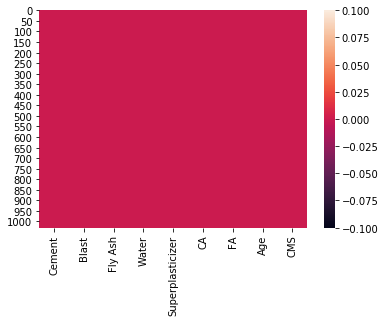

In [73]:
#checking null values visually
sns.heatmap(conc.isnull())

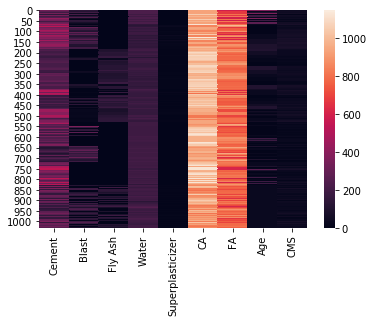

In [74]:
sns.heatmap(conc)

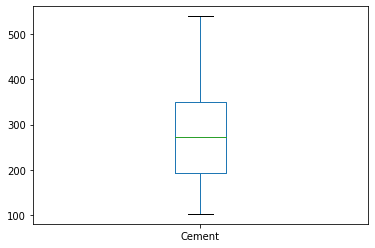

In [75]:
#checking for outliers
conc['Cement'].plot.box()

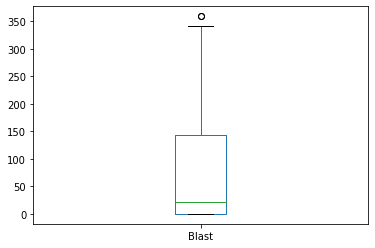

In [76]:
#checking for outliers
conc['Blast'].plot.box()

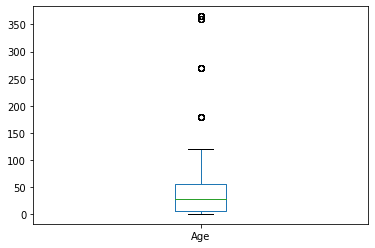

In [77]:
#checking for outliers
conc['Age'].plot.box()

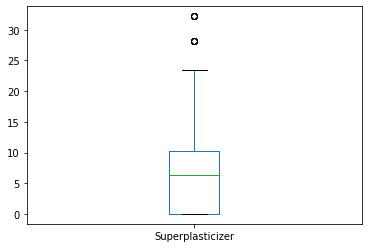

In [78]:
#checking for outliers
conc['Superplasticizer'].plot.box()

In [79]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(conc))

In [80]:
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [81]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [82]:
z[2][7]

3.553065687407453

In [83]:
z[936][3]

3.0609622296170462

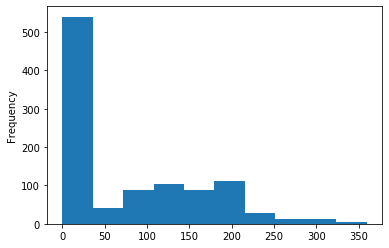

In [84]:
#checking skewness
conc['Blast'].plot.hist()

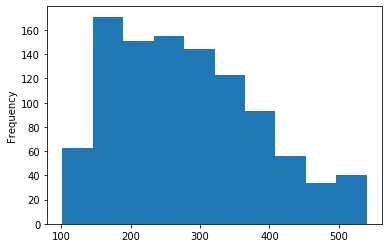

In [85]:
#checking skewness
conc['Cement'].plot.hist()

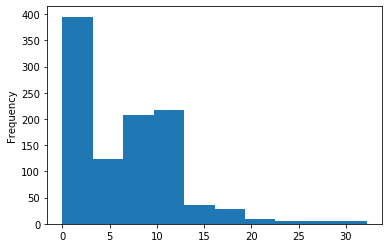

In [86]:
#checking skewness
conc['Superplasticizer'].plot.hist()

In [87]:
conc.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [88]:
#outliers removing
conc_new=conc[(z<3).all(axis=1)]
conc_new.shape

(981, 9)

In [89]:
conc.shape

(1030, 9)

In [90]:
conc=conc_new

In [91]:
#removing skewness
conc['Age']=np.log(conc['Age'])

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


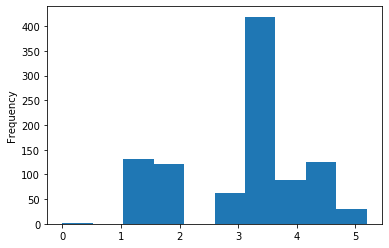

In [92]:
conc['Age'].plot.hist()

In [93]:
conc.skew()

Cement              0.508557
Blast               0.747827
Fly Ash             0.461726
Water              -0.017778
Superplasticizer    0.416828
CA                 -0.087932
FA                 -0.226214
Age                -0.398016
CMS                 0.463962
dtype: float64

In [120]:
conc.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,277.489399,73.106218,56.749745,180.760041,6.194495,974.729256,776.003976,3.081085,35.294220
std,102.594951,85.197793,64.439192,20.139643,5.486470,77.765000,77.651828,1.110219,16.733154
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,739.000000,1.945910,23.220000
50%,266.000000,22.000000,0.000000,184.000000,6.700000,968.000000,780.000000,3.332205,33.690000
75%,349.000000,144.200000,118.300000,192.000000,10.300000,1038.000000,822.200000,3.332205,45.300000
max,540.000000,316.100000,200.100000,237.000000,23.400000,1145.000000,992.600000,5.192957,82.600000


In [122]:
conc.isna().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [137]:
#conc.replace([np.inf,-np.inf],np.NaN) 
conc[np.isfinite(conc)]

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,4.499810,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,3.332205,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,3.332205,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,3.332205,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,3.332205,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,3.332205,32.77


In [95]:
conc

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,4.499810,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,3.332205,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,3.332205,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,3.332205,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,3.332205,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,3.332205,32.77


In [96]:
x=conc.iloc[:,0:-1]
x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,4.499810
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,3.332205
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205


In [97]:
y=conc.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: CMS, dtype: float64

In [98]:
x.shape

(981, 8)

In [99]:
y.shape

(981,)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [101]:
x_train.shape

(657, 8)

In [102]:
y_train.shape

(657,)

In [103]:
lm=LinearRegression()

In [104]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.coef_
#lm.intercept_

array([ 0.14259873,  0.12822722,  0.09727464, -0.12200523,  0.10086083,
        0.03459427,  0.04113835,  9.05473938])

In [107]:
lm.intercept_

-91.23139445724632

In [108]:
lm.score(x_train,y_train)

0.8467351027036314

In [111]:
predict=lm.predict(x_test)
print("predicted result price",predict)
print("actual price",y_test)

predicted result price [35.40248178 60.41230251 66.99333386 18.81983003 46.74239229 35.25863098
 52.16091311 21.23939981 25.167675   18.53879807 57.45033733 39.48239485
 25.14953251 14.18041712 34.58190185 24.48775534 43.76838592 33.76155438
 18.61792293 17.49796287 35.63910406  2.18117459 57.31921825 26.47328311
 44.26493738 28.09573705 45.8309914  36.93532841 54.34371457 23.98711511
 44.06051442 14.47294349 63.42105324 45.6676383  23.84600838 28.85475916
 47.15445615 30.67905893 39.18763393 46.50901256 52.40272297 65.45491789
 33.43180401 33.95634857 62.39880164 34.15794656 27.70346154 45.04384073
 26.04311883 22.72043878 44.05797569  6.38930113 16.06744605 10.43892915
 45.03966058 42.91121663 46.45746665 39.48239485 18.26718973 72.34148831
 62.08387454 50.3826897  41.25421208 48.2956096  31.3848442  30.42234029
 34.82566963 45.52634434 -1.10746982 38.76339351 53.54723484 18.54297823
 11.72514321 17.64353442 23.8490558  36.59490062 38.90456067 28.23801753
 31.8215128  29.21242654 61.

In [113]:
#finding error 
print("mean absolute error:",mean_absolute_error(y_test,predict))
print("mean squared error:",mean_squared_error(y_test,predict))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predict)))

mean absolute error: 5.646126857442574
mean squared error: 52.64757496096224
root mean squared error: 7.255864866503664


In [115]:
#finding r2 score
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,predict))

r2_score: 0.8026586822999332


In [118]:
from sklearn.externals import joblib
joblib.dump(lm,'lm_concrete.pkl')

['lm_concrete.pkl']